## Comparing 5 different Models on the MNIST Dataset - 21BAI1007


In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
(x_train, y_train1), (x_test, y_test1) = mnist.load_data()

In [9]:
X_train[1].shape

(28, 28, 1)

## Model 1 - 21BAI1007


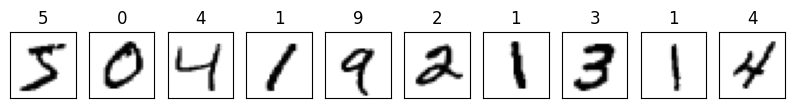

In [10]:
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(0, 10):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    ax[i].set_title(y_train1[i])
    ax[i].imshow(x_train[i], cmap=plt.cm.binary)

def baseline_model():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), padding='valid', strides=(1,1), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1152, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - loss: 0.1704 - accuracy: 0.9481 - val_loss: 0.0519 - val_accuracy: 0.9833 - 7s/epoch - 25ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0445 - val_accuracy: 0.9854 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0318 - val_accuracy: 0.9894 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0439 - val_accuracy: 0.9857 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0319 - val_accuracy: 0.9878 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0392 - val_accuracy: 0.9870 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0337 - val_accuracy: 0.9897 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0335 - val_accuracy: 0.9895 - 2s/epoch - 7ms/step
Epoch 9/10
300/300 - 2s

1/1 [==============================] - 0s 116ms/step
7


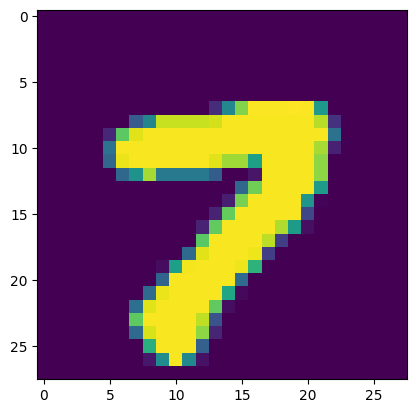

In [12]:
num = 79;
plt.imshow(x_test[num])
testSample = x_test[num].reshape(1, x_test[num].shape[0], 28, 1).astype('float32')
pred = model.predict(testSample)
for i in range(0, 10):
  if pred[0][i]==1:
    print(i);

## Second Model - 21BAI1007

In [13]:
def model2():
    model = Sequential()
    model.add(Convolution2D(64, (5, 5), padding='valid', strides=(1,2), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = model2()
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2776 - accuracy: 0.9120 - val_loss: 0.0809 - val_accuracy: 0.9759 - 5s/epoch - 18ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0716 - accuracy: 0.9788 - val_loss: 0.0477 - val_accuracy: 0.9853 - 2s/epoch - 5ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0508 - accuracy: 0.9852 - val_loss: 0.0413 - val_accuracy: 0.9864 - 2s/epoch - 5ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0410 - val_accuracy: 0.9878 - 2s/epoch - 5ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0413 - val_accuracy: 0.9880 - 2s/epoch - 5ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0416 - val_accuracy: 0.9888 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.0295 - val_accuracy: 0.9912 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0336 - val_accuracy: 0.9905 - 2s/epoch - 5ms/step
Epoch 9/10
300/300 - 2s

## Third model - 21BAI1007

In [14]:
def model3():
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), padding='valid', strides=(1,1), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model3 = model3()
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)
scores = model3.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
938/938 [==============================] - 8s 6ms/step - loss: 0.1879 - accuracy: 0.9421 - val_loss: 0.0496 - val_accuracy: 0.9832
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0538 - val_accuracy: 0.9845
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0282 - val_accuracy: 0.9919
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0302 - val_accuracy: 0.9912
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0293 - val_accuracy: 0.9912
Epoch 

## Fourth Model - ALEXNET - 21BAI1007

In [24]:
def model4():
    model = Sequential()
    model.add(Convolution2D(96, (3,3), strides=1, input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D((3,3), strides=2))
    model.add(Convolution2D(256, (5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=2))
    model.add(Convolution2D(384, (3,3), padding='same', activation='relu'))
    model.add(Convolution2D(384, (3,3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model4 = model4()
model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, verbose=1)
scores = model4.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/30
938/938 [==============================] - 25s 24ms/step - loss: 0.2003 - accuracy: 0.9366 - val_loss: 0.0520 - val_accuracy: 0.9865
Epoch 2/30
938/938 [==============================] - 22s 24ms/step - loss: 0.0599 - accuracy: 0.9841 - val_loss: 0.0521 - val_accuracy: 0.9866
Epoch 3/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0480 - accuracy: 0.9876 - val_loss: 0.0424 - val_accuracy: 0.9889
Epoch 4/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0403 - accuracy: 0.9895 - val_loss: 0.0411 - val_accuracy: 0.9893
Epoch 5/30
938/938 [==============================] - 22s 24ms/step - loss: 0.0351 - accuracy: 0.9914 - val_loss: 0.0590 - val_accuracy: 0.9866
Epoch 6/30
938/938 [==============================] - 22s 24ms/step - loss: 0.0301 - accuracy: 0.9924 - val_loss: 0.0663 - val_accuracy: 0.9843
Epoch 7/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0287 - accuracy: 0.9925 - val_loss: 0.0333 - val_accuracy:

## Fifth Model - VGG16 - 21BAI1007

In [29]:
from keras.layers import ZeroPadding2D

def model5():
    model = Sequential()
    model.add(Input((28, 28, 1)))
    model.add(ZeroPadding2D((2,2)))
    model.add(Convolution2D(64, (3,3), strides=1, padding='same', activation='relu'))
    model.add(Convolution2D(64, (3,3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(Convolution2D(128, (3,3), strides=1, padding='same', activation='relu'))
    model.add(Convolution2D(128, (3,3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(Convolution2D(256, (3,3), strides=1, padding='same', activation='relu'))
    model.add(Convolution2D(256, (3,3), strides=1, padding='same', activation='relu'))
    model.add(Convolution2D(256, (3,3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model5 = model5()
model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64, verbose=1)
scores = model5.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/15
938/938 [==============================] - 24s 22ms/step - loss: 0.1972 - accuracy: 0.9367 - val_loss: 0.0410 - val_accuracy: 0.9872
Epoch 2/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0550 - accuracy: 0.9843 - val_loss: 0.0381 - val_accuracy: 0.9891
Epoch 3/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0446 - val_accuracy: 0.9864
Epoch 4/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0343 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 5/15
938/938 [==============================] - 20s 22ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0398 - val_accuracy: 0.9896
Epoch 6/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0260 - accuracy: 0.9928 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 7/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0272 - val_accuracy:

### Results - 21BAI1007
First Model:
---------------
Accuracy: 99.16%

Error %: 0.84%

Second Model
---
Accuracy: 98.79%

Error %: 1.21%

Third Model
---
Accuracy: 99.27%

Error %: 0.73%

Fourth Model
---
Accuracy: 99.17%

Error %: 0.83%

Fifth Model
---
Accuracy: 99.14%

Error %: 0.86%